# Vehicle silhouettes

## Objective
To classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The 	vehicle may be viewed from one of many different angles.   

##Useful links:
https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://www.analyticsvidhya.com/blog/2018/12/building-a-random-forest-from-scratch-understanding-real-world-data-products-ml-for-programmers-part-3/

# Part 1: Random Forest from scratch

Random forests are an ensemble learning method for classification and regression that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [3]:
# Load the libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importing Data

In [4]:
# Load the dataset 
data = pd.read_csv('Data/vehicle.csv')

In [5]:
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


**Preprocessing**

In [6]:
# Checking the data types of each column
for i in data:
    print(i, ":", type(data[i][0]))

compactness : <class 'numpy.int64'>
circularity : <class 'numpy.float64'>
distance_circularity : <class 'numpy.float64'>
radius_ratio : <class 'numpy.float64'>
pr.axis_aspect_ratio : <class 'numpy.float64'>
max.length_aspect_ratio : <class 'numpy.int64'>
scatter_ratio : <class 'numpy.float64'>
elongatedness : <class 'numpy.float64'>
pr.axis_rectangularity : <class 'numpy.float64'>
max.length_rectangularity : <class 'numpy.int64'>
scaled_variance : <class 'numpy.float64'>
scaled_variance.1 : <class 'numpy.float64'>
scaled_radius_of_gyration : <class 'numpy.float64'>
scaled_radius_of_gyration.1 : <class 'numpy.float64'>
skewness_about : <class 'numpy.float64'>
skewness_about.1 : <class 'numpy.float64'>
skewness_about.2 : <class 'numpy.float64'>
hollows_ratio : <class 'numpy.int64'>
class : <class 'str'>


In [7]:
# Check for null values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
# Filling the null values if any
data = data.fillna(0)

In [9]:
# Check for null values
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#Printing the unique values

for i in data.columns:
    print(i, ":", len(data[i].unique()))

compactness : 44
circularity : 28
distance_circularity : 64
radius_ratio : 135
pr.axis_aspect_ratio : 38
max.length_aspect_ratio : 21
scatter_ratio : 132
elongatedness : 36
pr.axis_rectangularity : 14
max.length_rectangularity : 66
scaled_variance : 129
scaled_variance.1 : 423
scaled_radius_of_gyration : 144
scaled_radius_of_gyration.1 : 40
skewness_about : 23
skewness_about.1 : 41
skewness_about.2 : 31
hollows_ratio : 31
class : 3


### Preprocessing

**Label Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['class']
data[cols[0:]] = data[cols[0:]].apply(lambda col: le.fit_transform(col))

**Normalizing**

In [12]:
from sklearn.preprocessing import MinMaxScaler
columns = data.columns
mms = MinMaxScaler()
data[columns[:-1]] = mms.fit_transform(data[columns[:-1]])

In [13]:
#checking if still there is a missing value
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.813559,0.741071,0.534535,0.521739,0.150943,0.611321,0.688525,0.689655,0.585714,0.550000,0.372299,0.686567,0.518519,0.272727,0.390244,0.907767,0.533333,2
1,0.391304,0.694915,0.750000,0.423423,0.413043,0.132075,0.562264,0.737705,0.655172,0.357143,0.531250,0.324165,0.589552,0.533333,0.409091,0.341463,0.917476,0.600000,2
2,0.673913,0.847458,0.946429,0.627628,0.478261,0.150943,0.781132,0.524590,0.793103,0.571429,0.696875,0.623772,0.820896,0.540741,0.636364,0.219512,0.912621,0.500000,1
3,0.434783,0.694915,0.732143,0.477477,0.456522,0.132075,0.543396,0.754098,0.655172,0.357143,0.500000,0.303536,0.473881,0.466667,0.272727,0.243902,0.966019,0.866667,2
4,0.260870,0.745763,0.625000,0.615616,0.746377,0.943396,0.562264,0.737705,0.655172,0.371429,0.753125,0.319253,0.701493,0.940741,0.409091,0.268293,0.873786,0.066667,0


### X and Y

In [15]:
# Filling missing values (if any)

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [18]:
# Checking the columns
pd.DataFrame(X)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.478261,0.813559,0.741071,0.534535,0.521739,0.150943,0.611321,0.688525,0.689655,0.585714,0.550000,0.372299,0.686567,0.518519,0.272727,0.390244,0.907767,0.533333
1,0.391304,0.694915,0.750000,0.423423,0.413043,0.132075,0.562264,0.737705,0.655172,0.357143,0.531250,0.324165,0.589552,0.533333,0.409091,0.341463,0.917476,0.600000
2,0.673913,0.847458,0.946429,0.627628,0.478261,0.150943,0.781132,0.524590,0.793103,0.571429,0.696875,0.623772,0.820896,0.540741,0.636364,0.219512,0.912621,0.500000
3,0.434783,0.694915,0.732143,0.477477,0.456522,0.132075,0.543396,0.754098,0.655172,0.357143,0.500000,0.303536,0.473881,0.466667,0.272727,0.243902,0.966019,0.866667
4,0.260870,0.745763,0.625000,0.615616,0.746377,0.943396,0.562264,0.737705,0.655172,0.371429,0.753125,0.319253,0.701493,0.940741,0.409091,0.268293,0.873786,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.434783,0.661017,0.776786,0.549550,0.463768,0.113208,0.637736,0.655738,0.689655,0.228571,0.625000,0.414538,0.555970,0.533333,0.318182,0.609756,0.912621,0.466667
842,0.347826,0.779661,0.750000,0.489489,0.478261,0.169811,0.600000,0.704918,0.689655,0.585714,0.540625,0.361493,0.656716,0.533333,0.045455,0.487805,0.902913,0.533333
843,0.717391,0.915254,0.901786,0.666667,0.485507,0.188679,0.837736,0.491803,0.862069,0.785714,0.712500,0.708251,0.746269,0.518519,0.136364,0.097561,0.907767,0.666667
844,0.282609,0.610169,0.696429,0.438438,0.420290,0.094340,0.509434,0.819672,0.620690,0.085714,0.484375,0.265226,0.552239,0.488889,0.000000,0.609756,0.922330,0.466667


In [19]:
# Checking the columns
y

0      2
1      2
2      1
3      2
4      0
      ..
841    1
842    2
843    1
844    1
845    2
Name: class, Length: 846, dtype: int32

In [16]:
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0)

In [17]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (592, 18) , y_train: (592,)
X_test: (254, 18) , y_test: (254,)


### Model

In [20]:
# Randomly choose the features from training set and build decision tree
# Randomness in the features will help us to achieve different DTrees every time
# You can keep minimum number of random features every time so that trees will have sufficient features
# Note: You can use builtin function for DT training using Sklearn
import random
def random_features(X_train, l):
    orig_features = list(X_train.columns)
    random_features = random.sample(orig_features,k=l)

    return random_features

In [21]:
# Train N number of decision trees using random feature selection strategy
# Number of trees N can be user input
n = int(input("Enter the number of trees: "))
len = int(input("Enter the minimum features you want: "))
trees = []
feature = []
for i in range(n):
    features = random_features(X_train,len+i)
    feature.append(features)
    clf = DecisionTreeClassifier()
    clf.fit(X_train[features].values.astype('float'), y_train.values.astype('float'))
    trees.append(clf)

Enter the number of trees: 3
Enter the minimum features you want: 5


In [22]:
# To check the various random feature combos
feature

[['skewness_about.1',
  'skewness_about.2',
  'scaled_variance',
  'hollows_ratio',
  'distance_circularity'],
 ['radius_ratio',
  'skewness_about.1',
  'scaled_radius_of_gyration',
  'pr.axis_rectangularity',
  'max.length_aspect_ratio',
  'hollows_ratio'],
 ['compactness',
  'max.length_aspect_ratio',
  'pr.axis_rectangularity',
  'skewness_about.1',
  'scaled_radius_of_gyration.1',
  'scatter_ratio',
  'scaled_radius_of_gyration']]

In [23]:
# Apply different voting mechanisms such as 
# max voting/average voting/weighted average voting (using accuracy as weightage)
# Perform the ensembling for the training set.
from sklearn.metrics import precision_recall_fscore_support

**Average**

In [24]:
# Apply invidual trees trained on the testingset
# Note: You should've saved the feature sets used for training invidual trees,
# so that same features can be chosen in testing set

# Get predictions on testing set
accu = []
prec = []
rec = []
fs = []
i=0
for clf in trees:
    features = feature[i]
    i+=1
    predictions = clf.predict(X_test[features].values)

    y_pred= []
    for row_number in range(predictions.shape[0]):
      y_pred.append(np.mean(predictions[row_number, ]))
    y_pred = np.array(y_pred)
    acc = clf.score(X_test[features].values,y_test.values)
    # arr = y_pred - y_test.values
    # accuracy = np.count_nonzero(arr==0)/(y_pred.shape[0])
    accu.append(acc)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred,beta=1.0)
    prec.append(np.mean(precision))
    rec.append(np.mean(recall))
    fs.append(np.mean(fscore))

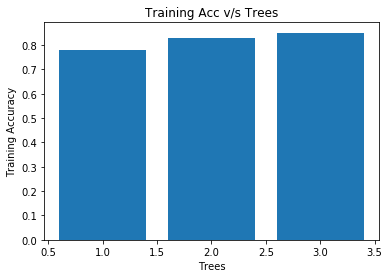

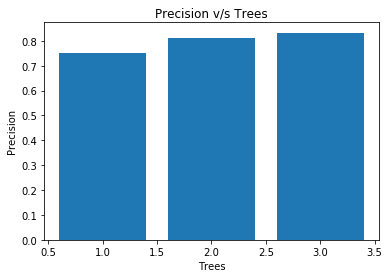

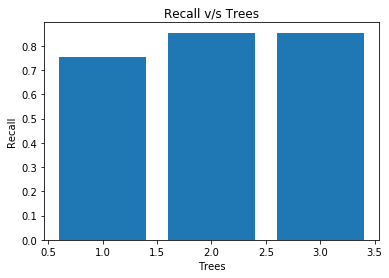

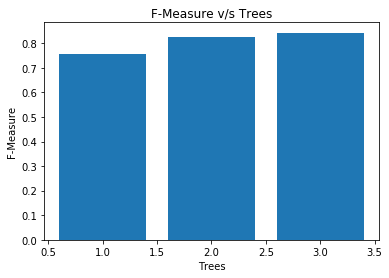

In [25]:
# Evaluate the results using accuracy, precision, recall and f-measure
import matplotlib.pyplot as plt 
ntre = []
for i in range(n):
  ntre.append(i+1)
plt.xlabel("Trees") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Trees") 
# creating the bar plot 
plt.bar(ntre, accu) 

plt.show() 

plt.bar(ntre, prec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Precision") 
plt.title("Precision v/s Trees") 
plt.show() 

plt.bar(ntre, rec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Recall") 
plt.title("Recall v/s Trees") 
plt.show() 

plt.bar(ntre, fs ) 
  
plt.xlabel("Trees") 
plt.ylabel("F-Measure") 
plt.title("F-Measure v/s Trees") 
plt.show() 

### Weighted Averaging

In [26]:
accu = []
prec = []
rec = []
fs = []
i=0
for clf in trees:
    features = feature[i]
    i+=1
    predictions = clf.predict(X_test[features].values)

    y_pred= []
    weights = clf.score(X_test[features].values,predictions)
    
    for row_number in range(predictions.shape[0]):
        y_pred.append(np.mean(predictions[row_number, ]*weights))
        
    y_pred = np.array(y_pred)
    acc = clf.score(X_test[features].values,y_test.values)
    # arr = y_pred - y_test.values
    # accuracy = np.count_nonzero(arr==0)/(y_pred.shape[0])
    accu.append(acc)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred,beta=1.0)
    prec.append(np.mean(precision))
    rec.append(np.mean(recall))
    fs.append(np.mean(fscore))



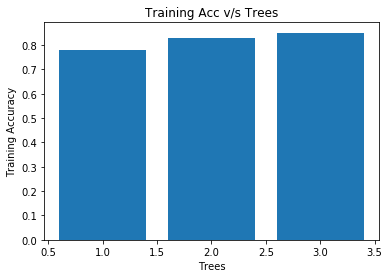

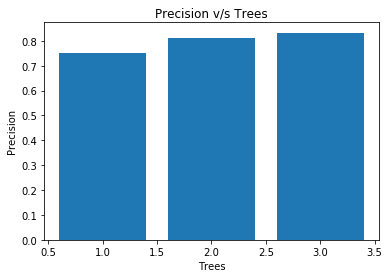

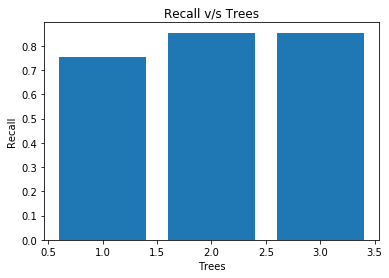

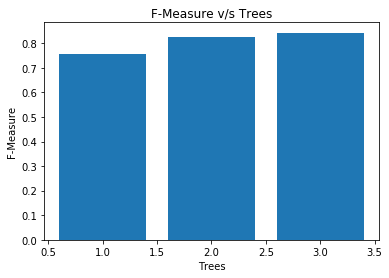

In [27]:
# For weighted Averaging
# Evaluate the results using accuracy, precision, recall and f-measure
import matplotlib.pyplot as plt 
ntre = []
for i in range(n):
  ntre.append(i+1)
plt.xlabel("Trees") 
plt.ylabel("Training Accuracy") 
plt.title("Training Acc v/s Trees") 
# creating the bar plot 
plt.bar(ntre, accu) 

plt.show() 

plt.bar(ntre, prec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Precision") 
plt.title("Precision v/s Trees") 
plt.show() 

plt.bar(ntre, rec ) 
  
plt.xlabel("Trees") 
plt.ylabel("Recall") 
plt.title("Recall v/s Trees") 
plt.show() 

plt.bar(ntre, fs ) 
  
plt.xlabel("Trees") 
plt.ylabel("F-Measure") 
plt.title("F-Measure v/s Trees") 
plt.show() 


## Part 2: Random Forest using Sklearn

In [28]:
# Use the preprocessed dataset here

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0)

In [29]:
# Train the Random Forest Model using builtin Sklearn Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(1000,max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Test the model with testing set and print the accuracy, precision, recall and f-measure
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)

0.7834645669291339


In [31]:
# Play with parameters such as
# number of decision trees
# Criterion for splitting
# Max depth
# Minimum samples per split and leaf
clf = RandomForestClassifier(100,max_depth=5, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)

0.9212598425196851


### Changed some parameters to improve accuracy

In [33]:
clf = RandomForestClassifier(1000,max_depth=5, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
y_pred = clf.predict(X_test)
acc = clf.score(X_test,y_test)
print(acc)

0.9291338582677166
